<a id="2"></a>
# <p style="background-color:blue;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> M.TECH MAJOR PROJECT Reg BL.EN.P2DSC20005 </p>
<a id="2"></a>





<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:lightpink;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. INTRODUCTION AND IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA CLEANING](#3)
    
* [4. DATA PREPROCESSING](#4)   
    
* [5. DIMENSIONALITY REDUCTION](#5) 
      
* [6. EVALUATING MODELS](#6)
    
* [7. CONCLUSION](#7)
    
* [8. END  EXIT](#8)

# Instalation 
Intregating pyspark and kafka in jupyter notebook 


In [1]:
import pyspark
import findspark
findspark.init()


findspark.find()

'C:\\Users\\abhi\\.conda\\envs\\pyspark1\\lib\\site-packages\\pyspark'

<a id="2"></a>
# <p style="background-color:lightpink;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CREATE SPARK SESSION</p>

In [2]:
from pyspark.sql import SparkSession
sc = SparkSession.builder. \
appName("Major Project").\
master("local[1]").\
config("spark.memory.offHeap.enabled","true"). \
config("spark.memory.offHeap.size","10g").getOrCreate()


sc

<a id="2"></a>
# <p style="background-color:lightpink;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORT LIBRARY</p>

In [3]:
import pyspark
import findspark

from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession


from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline


import pandas as pd
import numpy as np


<a id="2"></a>
# <p style="background-color:lightpink;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> DATA SET TOTAL SIZE-21 GB</p>

<a id="2"></a>
# <p style="background-color:BLUE;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA SET</p>

In [4]:
df= sc.read.option("header",True).csv(r"C:\Users\abhi\Desktop\data Engineer\pysparkproject\iot23updated\iotnewdata.csv")

In [5]:
df.limit(5).toPandas()

,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_packets,src2dst_bytes,dst2src_first_seen_ms,dst2src_last_seen_ms,dst2src_packets,dst2src_bytes,dst2src_duration_ms,src2dst_duration_ms,Target
0,0,1,405,1537522897732,1537522897732,1,405,0,0,0,0,0,0,0
1,0,1,425,1537522897732,1537522897732,1,425,0,0,0,0,0,0,0
2,0,1,405,1537522897732,1537522897732,1,405,0,0,0,0,0,0,0
3,7005,4,972,1537523212430,1537523219435,4,972,0,0,0,0,0,7005,0
4,7006,4,972,1537523212430,1537523219436,4,972,0,0,0,0,0,7006,0


<a id="2"></a>
# <p style="background-color:lightpink;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">OVERVIEW OF DATASET</p>

In [6]:
df.printSchema()

root
 |-- bidirectional_duration_ms: string (nullable = true)
 |-- bidirectional_packets: string (nullable = true)
 |-- bidirectional_bytes: string (nullable = true)
 |-- src2dst_first_seen_ms: string (nullable = true)
 |-- src2dst_last_seen_ms: string (nullable = true)
 |-- src2dst_packets: string (nullable = true)
 |-- src2dst_bytes: string (nullable = true)
 |-- dst2src_first_seen_ms: string (nullable = true)
 |-- dst2src_last_seen_ms: string (nullable = true)
 |-- dst2src_packets: string (nullable = true)
 |-- dst2src_bytes: string (nullable = true)
 |-- dst2src_duration_ms: string (nullable = true)
 |-- src2dst_duration_ms: string (nullable = true)
 |-- Target: string (nullable = true)



In [7]:
df.columns

['bidirectional_duration_ms',
 'bidirectional_packets',
 'bidirectional_bytes',
 'src2dst_first_seen_ms',
 'src2dst_last_seen_ms',
 'src2dst_packets',
 'src2dst_bytes',
 'dst2src_first_seen_ms',
 'dst2src_last_seen_ms',
 'dst2src_packets',
 'dst2src_bytes',
 'dst2src_duration_ms',
 'src2dst_duration_ms',
 'Target']

In [8]:
print('Number of rows: \t', df.count())
print('Number of columns: \t', len(df.columns))

Number of rows: 	 33170045
Number of columns: 	 14


In [9]:
df.groupBy('Target').count().show()

+------+--------+
|Target|   count|
+------+--------+
|     0|    2878|
|     1|33167167|
+------+--------+



In [10]:
for col in df.columns:
    print(col.ljust(20), df.filter(df[col].isNull()).count())

bidirectional_duration_ms 0
bidirectional_packets 0
bidirectional_bytes  0
src2dst_first_seen_ms 0
src2dst_last_seen_ms 0
src2dst_packets      0
src2dst_bytes        0
dst2src_first_seen_ms 0
dst2src_last_seen_ms 0
dst2src_packets      0
dst2src_bytes        0
dst2src_duration_ms  0
src2dst_duration_ms  0
Target               0


<a id="2"></a>
# <p style="background-color:lightpink;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

In [11]:
#In this code snippet conert data type each columns into integer type for feeding this data into 
# as input tovector assembler
for col in df.columns:
    df = df.withColumn(col, df[col].cast(IntegerType()))

In [12]:
df.printSchema()

root
 |-- bidirectional_duration_ms: integer (nullable = true)
 |-- bidirectional_packets: integer (nullable = true)
 |-- bidirectional_bytes: integer (nullable = true)
 |-- src2dst_first_seen_ms: integer (nullable = true)
 |-- src2dst_last_seen_ms: integer (nullable = true)
 |-- src2dst_packets: integer (nullable = true)
 |-- src2dst_bytes: integer (nullable = true)
 |-- dst2src_first_seen_ms: integer (nullable = true)
 |-- dst2src_last_seen_ms: integer (nullable = true)
 |-- dst2src_packets: integer (nullable = true)
 |-- dst2src_bytes: integer (nullable = true)
 |-- dst2src_duration_ms: integer (nullable = true)
 |-- src2dst_duration_ms: integer (nullable = true)
 |-- Target: integer (nullable = true)



<a id="2"></a>
# <p style="background-color:lightpink;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CREATING FEATURE VECTOR USING VECTOR ASSEMBLER </p>

Preparing Dataset for Machine Learning

In [13]:
featureCols= ['bidirectional_duration_ms','bidirectional_packets','bidirectional_bytes',
              'src2dst_packets','src2dst_bytes','dst2src_packets','dst2src_bytes',
              'dst2src_duration_ms','src2dst_duration_ms']

In [14]:
len(featureCols)

9

In [15]:
# put features into a feature vector column
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler


assembler = VectorAssembler(inputCols=featureCols, outputCol="features") 
assembled_df = assembler.transform(df)

In [16]:
assembled_df.limit(2).toPandas()

,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_packets,src2dst_bytes,dst2src_first_seen_ms,dst2src_last_seen_ms,dst2src_packets,dst2src_bytes,dst2src_duration_ms,src2dst_duration_ms,Target,features
0,0,1,405,NaN,NaN,1,405,0,0,0,0,0,0,0,"(0.0, 1.0, 405.0, 1.0, 405.0, 0.0, 0.0, 0.0, 0.0)"
1,0,1,425,NaN,NaN,1,425,0,0,0,0,0,0,0,"(0.0, 1.0, 425.0, 1.0, 425.0, 0.0, 0.0, 0.0, 0.0)"


In [17]:
assembled_df.columns

['bidirectional_duration_ms',
 'bidirectional_packets',
 'bidirectional_bytes',
 'src2dst_first_seen_ms',
 'src2dst_last_seen_ms',
 'src2dst_packets',
 'src2dst_bytes',
 'dst2src_first_seen_ms',
 'dst2src_last_seen_ms',
 'dst2src_packets',
 'dst2src_bytes',
 'dst2src_duration_ms',
 'src2dst_duration_ms',
 'Target',
 'features']

In [18]:
assembled_df.select("features").show()

+--------------------+
|            features|
+--------------------+
|(9,[1,2,3,4],[1.0...|
|(9,[1,2,3,4],[1.0...|
|(9,[1,2,3,4],[1.0...|
|[7005.0,4.0,972.0...|
|[7006.0,4.0,972.0...|
|[7006.0,4.0,1052....|
|[4.0,2.0,180.0,2....|
|[2496.0,59.0,3090...|
|[7551.0,3.0,210.0...|
|[12.0,2.0,238.0,1...|
|[12.0,2.0,166.0,1...|
|[33.0,7.0,737.0,4...|
|[19644.0,48.0,127...|
|[9029.0,27.0,9005...|
|[49.0,2.0,180.0,1...|
|[7552.0,63.0,2072...|
|[144999.0,35.0,16...|
|[13.0,2.0,210.0,1...|
|[12.0,2.0,198.0,1...|
|[0.0,2.0,180.0,1....|
+--------------------+
only showing top 20 rows



<a id="2"></a>
# <p style="background-color:lightpink;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">VECTOR ASSEMBLERL</p>

In [19]:
assembled_df.columns

['bidirectional_duration_ms',
 'bidirectional_packets',
 'bidirectional_bytes',
 'src2dst_first_seen_ms',
 'src2dst_last_seen_ms',
 'src2dst_packets',
 'src2dst_bytes',
 'dst2src_first_seen_ms',
 'dst2src_last_seen_ms',
 'dst2src_packets',
 'dst2src_bytes',
 'dst2src_duration_ms',
 'src2dst_duration_ms',
 'Target',
 'features']

In [20]:
# Inspect the result
assembled_df.select("Target", "features").show(2, truncate=False)

+------+-----------------------------------+
|Target|features                           |
+------+-----------------------------------+
|0     |(9,[1,2,3,4],[1.0,405.0,1.0,405.0])|
|0     |(9,[1,2,3,4],[1.0,425.0,1.0,425.0])|
+------+-----------------------------------+
only showing top 2 rows



<a id="2"></a>
# <p style="background-color:lightpink;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">STANDARD SCALER</p>

In [21]:
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")

scaled_df = standardScaler.fit(assembled_df).transform(assembled_df)

In [22]:
scaled_df.limit(1).toPandas()

,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_packets,src2dst_bytes,dst2src_first_seen_ms,dst2src_last_seen_ms,dst2src_packets,dst2src_bytes,dst2src_duration_ms,src2dst_duration_ms,Target,features,features_scaled
0,0,1,405,NaN,NaN,1,405,0,0,0,0,0,0,0,"(0.0, 1.0, 405.0, 1.0, 405.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0156315659127593, 0.006432534904303015..."


In [23]:
model_df=scaled_df.select("Target", "features_scaled")

In [24]:
model_df.show(2, truncate=False)

+------+------------------------------------------------------------------------------------------------+
|Target|features_scaled                                                                                 |
+------+------------------------------------------------------------------------------------------------+
|0     |(9,[1,2,3,4],[0.0156315659127593,0.006432534904303015,0.042776365262856185,0.07502997379496365])|
|0     |(9,[1,2,3,4],[0.0156315659127593,0.006750190948959954,0.042776365262856185,0.07873515768607296])|
+------+------------------------------------------------------------------------------------------------+
only showing top 2 rows



In [25]:
model_df.columns

['Target', 'features_scaled']

<a id="2"></a>
# <p style="background-color:lightpink;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Random Forest Classifier</p>

In [26]:
from pyspark.ml.classification import RandomForestClassifier

train_data, test_data,validation_data = model_df.randomSplit([0.2, 0.2, 0.6])

In [49]:
from pyspark.ml.classification import RandomForestClassifier

train_data, test_data,validation_data = model_df.randomSplit([0.2, 0.2, 0.6])


print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))
print("Test Dataset Count: " + str(validation_data.count()))



Training Dataset Count: 6636429
Test Dataset Count: 6631262
Test Dataset Count: 19902354


In [27]:
from pyspark.ml.classification import RandomForestClassifier
import time

rf = RandomForestClassifier(featuresCol = 'features_scaled', labelCol = 'Target')

start = time.time()

rfModel = rf.fit(train_data)

end = time.time()
print("total time",end - start)





total time 1139.6634466648102


In [33]:
start = time.time()

predictions = rfModel.transform(test_data)

end = time.time()
print("total time",end - start)

total time 0.10112810134887695


In [31]:
train_data.columns

['Target', 'features_scaled']

In [35]:
import time
start = time.time()

rf_predictions=rf_classifier.transform(test_data)

end = time.time()
print("total time",end - start)


total time 0.06191849708557129


In [36]:
rf_predictions.show()

+------+--------------------+--------------------+--------------------+----------+
|Target|     features_scaled|       rawPrediction|         probability|prediction|
+------+--------------------+--------------------+--------------------+----------+
|     0|(9,[1,2,3,4],[0.0...|[0.00269427341932...|[3.84896202761231...|       1.0|
|     0|(9,[1,2,3,4],[0.0...|[0.00269427341932...|[3.84896202761231...|       1.0|
|     0|(9,[1,2,3,4],[0.0...|[0.00269427341932...|[3.84896202761231...|       1.0|
|     0|(9,[1,2,3,4],[0.0...|[0.00269427341932...|[3.84896202761231...|       1.0|
|     0|(9,[1,2,3,4],[0.0...|[0.00269427341932...|[3.84896202761231...|       1.0|
|     0|(9,[1,2,3,4],[0.0...|[0.00269427341932...|[3.84896202761231...|       1.0|
|     0|(9,[1,2,3,4],[0.0...|[0.00269427341932...|[3.84896202761231...|       1.0|
|     0|(9,[1,2,3,4],[0.0...|[0.00269427341932...|[3.84896202761231...|       1.0|
|     0|(9,[1,2,3,4],[0.0...|[0.00269427341932...|[3.84896202761231...|       1.0|
|   

In [40]:
rf_predictions.groupBy('prediction').count().show()

+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0|     10|
|       1.0|6634754|
+----------+-------+



In [44]:
rf_predictions.select(['probability','Target','prediction']).show(10,False)

+-----------------------------------------+------+----------+
|probability                              |Target|prediction|
+-----------------------------------------+------+----------+
|[3.848962027612315E-5,0.9999615103797239]|0     |1.0       |
|[3.848962027612315E-5,0.9999615103797239]|0     |1.0       |
|[3.848962027612315E-5,0.9999615103797239]|0     |1.0       |
|[3.848962027612315E-5,0.9999615103797239]|0     |1.0       |
|[3.848962027612315E-5,0.9999615103797239]|0     |1.0       |
|[3.848962027612315E-5,0.9999615103797239]|0     |1.0       |
|[3.848962027612315E-5,0.9999615103797239]|0     |1.0       |
|[3.848962027612315E-5,0.9999615103797239]|0     |1.0       |
|[3.848962027612315E-5,0.9999615103797239]|0     |1.0       |
|[3.848962027612315E-5,0.9999615103797239]|0     |1.0       |
+-----------------------------------------+------+----------+
only showing top 10 rows



In [41]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
rf_accuracy=MulticlassClassificationEvaluator(labelCol='Target',metricName='accuracy').evaluate(rf_predictions)

print('The accuracy of RF on test data is {0:.0%}'.format(rf_accuracy))

The accuracy of RF on test data is 100%


In [42]:
print(rf_accuracy)

0.9999086629155159


In [43]:
rf_precision=MulticlassClassificationEvaluator(labelCol='Target',metricName='weightedPrecision').evaluate(rf_predictions)
print('The precision rate on test data is {0:.0%}'.format(rf_precision))

The precision rate on test data is 100%


In [45]:
rf_precision

0.9998995676525415

In [46]:
rf_auc=BinaryClassificationEvaluator(labelCol='Target').evaluate(rf_predictions)

In [47]:
print(rf_auc)

0.9607570909194287


In [49]:
# Build the evaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol="Target", predictionCol="prediction", metricName="weightedFMeasure", metricLabel=1.0, beta = 2.0)

In [50]:
# Print out scores
print("F-2 score: ", evaluator.evaluate(predictions,  {evaluator.metricName: "weightedFMeasure"}), "\n")
print("Weighted Precision: ", evaluator.evaluate(predictions,  {evaluator.metricName: "weightedPrecision"}), "\n")
print("Weighted Recall: ", evaluator.evaluate(predictions,  {evaluator.metricName: "weightedRecall"}), "\n","\n","\n")


print("F-1 Score: ", evaluator.evaluate(predictions,  {evaluator.metricName: "f1"}), "\n")
print("Precision: ", evaluator.evaluate(predictions,  {evaluator.metricName: "precisionByLabel"}), "\n")
print("Recall: ",evaluator.evaluate(predictions,  {evaluator.metricName: "recallByLabel"}), "\n")

F-2 score:  0.9999008275416646 

Weighted Precision:  0.999914281037826 

Weighted Recall:  0.9999157468148075 
 
 

F-1 Score:  0.9998807791166161 

Precision:  0.9999158968135292 

Recall:  0.999999849264789 



featureCols2 =
![image.png](attachment:image.png)


In [52]:
#Predict on training
prediction_train = rfModel.transform(train_data)

y_pred_train=prediction_train.select("prediction").collect()
y_orig_train=prediction_train.select("Target").collect()


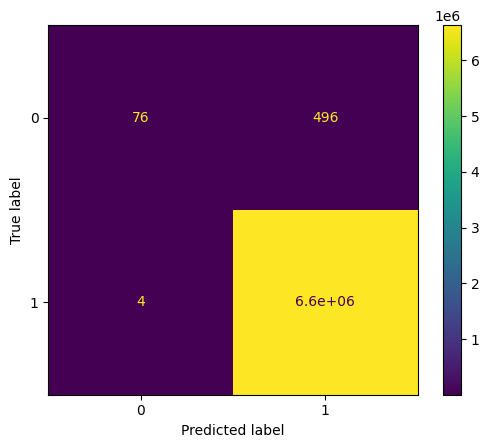

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#import matplotlib as plt

cm_train = confusion_matrix(y_orig_train, y_pred_train)

import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()

plt.savefig('confusion_matrix_train.png')
plt.show()

In [ ]:
rf_classifier.featureImportances

In [ ]:
#END 15-2-2023


In [ ]:
m

<a id="2"></a>
# <p style="background-color:lightpink;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CREATING NEW DATAFRAME(model_df) FOR ML MODEL</p>

In [ ]:
model_df = scaled_df.select(['Target','features_scaled'])

In [ ]:
model_df.groupBy('Target').count().show()


<a id="2"></a>
# <p style="background-color:lightpink;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">SPLIT DATASET INTO Train_data,Test_data AND Validation SET</p>

In [ ]:
train_data, test_data,validation_data = model_df.randomSplit([0.2, 0.2, 0.6])

In [ ]:
print('Train Shape: ({}, {})'.format(train_data.count(), len(train_data.columns)))

In [ ]:
print('Test Shape: ({}, {})'.format(test_data.count(), len(test_data.columns)))

In [ ]:
print('validity: ({}, {})'.format(validation_data.count(), len(validation_data.columns)))


<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">model</p>

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
rf_classifier=RandomForestClassifier(labelCol='Target',numTrees=50).fit(train_data)

In [ ]:
rf_predictions=rf_classifier.transform(test_df)

In [ ]:
rf_predictions.show()



<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CREATING CSV FILE FROM OF Train_data.csv,test_data.csv and validation.csv</p>





In [ ]:
for col in train_data.columns:
    df1 = train_data.withColumn(col,train_data[col].cast(StringType()))

In [ ]:
df2.write.options(header='True', delimiter=',') \
 .csv("/tmp/spark_output/zipcodes")

In [ ]:
df1.coalesce(1).write.options(header='True').mode('overwrite').csv("C:/Users/abhi/Desktop/data Engineer/pysparkproject/train121")

In [ ]:
for col in test_data.columns:
    df2 = test_data.withColumn(col, test_data[col].cast(StringType()))

In [ ]:
df2.coalesce(1).write.options(header='True').mode('overwrite').csv("C:/Users/abhi/Desktop/data Engineer/pysparkproject/test")

In [ ]:
for col in validation_data.columns:
    df3 = validation_data.withColumn(col, validation_data[col].cast(StringType()))

In [ ]:
df3.coalesce(1).write.options(header='True').mode('overwrite').csv("C:/Users/abhi/Desktop/data Engineer/pysparkproject/validation121")

In [ ]:
pwd

<a id="2"></a>
# <p style="background-color:lightpink;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TRAINING AND MODEL FIT </p>

#work on progress